In [19]:
import pandas as pd
import seaborn as sns
sns.set()
from pandas import datetime

In [20]:
df = pd.read_csv("../data/sales-of-shampoo-over-a-three-ye.csv")
df = df.drop(36, axis=0)
df.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [21]:
df["Month"] = "190" + df["Month"]
df.columns = ["month", "sales"]
df.head()

,month,sales
0,1901-01,266.0
1,1901-02,145.9
2,1901-03,183.1
3,1901-04,119.3
4,1901-05,180.3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 2 columns):
month    36 non-null object
sales    36 non-null float64
dtypes: float64(1), object(1)
memory usage: 864.0+ bytes


In [26]:
df.month = pd.to_datetime(df.month)
df.head()

,month,sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [29]:
df = df.set_index("month", drop=True)
df.head()

,sales
month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


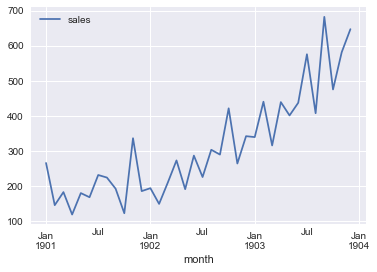

In [35]:
df.plot()

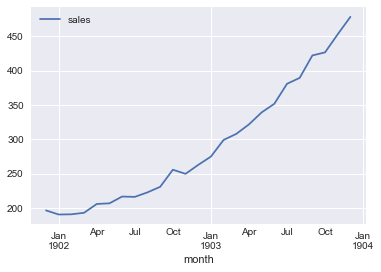

In [37]:
df.rolling(12).mean().plot()

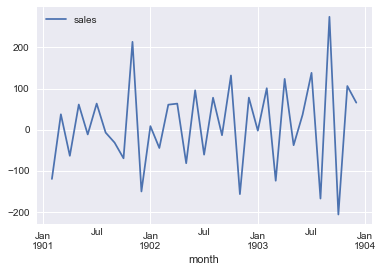

In [32]:
df.diff().plot()

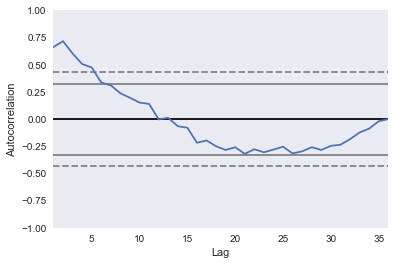

In [34]:
pd.plotting.autocorrelation_plot(df)

# fit a model

In [31]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df["sales"], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]`

                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 22 Oct 2018   AIC                            406.340
Time:                        20:11:47   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.sales    -0.6203      0.282     

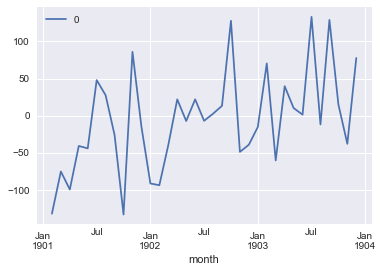

In [41]:
import pandas as pd
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

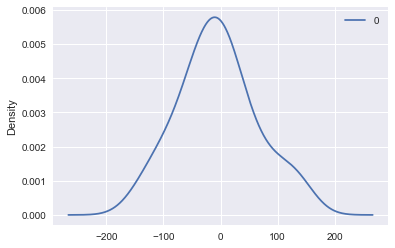

In [42]:
residuals.plot(kind='kde')

In [43]:
residuals.describe()

,0
count,35.000000
mean,-5.495189
std,68.132884
min,-133.296583
25%,-42.477916
50%,-7.186570
75%,24.748367
max,133.237999


# split, then fit model and forecast

In [49]:
series = df["sales"]
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

predicted=349.117727, expected=342.300000
predicted=306.513008, expected=339.700000
predicted=387.376434, expected=440.400000
predicted=348.154107, expected=315.900000
predicted=386.308781, expected=439.300000
predicted=356.081956, expected=401.300000
predicted=446.379477, expected=437.400000
predicted=394.737301, expected=575.500000
predicted=434.915489, expected=407.600000
predicted=507.923423, expected=682.000000
predicted=435.482775, expected=475.300000
predicted=652.743772, expected=581.300000
Test MSE: 6695.552


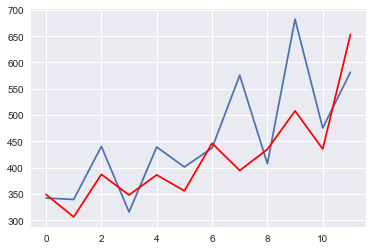

In [53]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('../data/sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser, nrows=35)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()